In [2]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score

# Accuracy

In [3]:
def accuracy_plot(df):
    try:
        threshold = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
        accuracy_dict = {}
        for i in range(1, 9):
            prediction = df[str(i) + '_pred'].apply(lambda x: x >= threshold[i-1])
            accuracy = (prediction == df[str(i)]).mean() * 100

            # Store accuracy for this threshold
            accuracy_dict[i] = accuracy
        
        tags = list(accuracy_dict.keys())
        acc = list(accuracy_dict.values())
        # Plotting the bar chart
        plt.bar(tags, acc)
        plt.xlabel('Tag')
        plt.ylabel('Accuracy')
        plt.title('Accuracy per tag')
        # Add number on top
        for i in range(len(tags)):
            plt.text(i + 1, acc[i] + 1, '{:.1f}'.format(acc[i]), ha='center')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        return False

In [4]:
def f1_plot(df):
    try:
        threshold = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
        f1_dict = {}
        fig, axes = plt.subplots(3, 3, figsize=(20, 20))

        for i in range(1, 9):
            predictions = df[str(i) + '_pred'].apply(lambda x: x >= threshold[i-1])

            # Calculate F1 score
            f1 = f1_score(df[str(i)], predictions)
            f1_dict[str(i)] = f1

            # Calculate confusion matrix
            cm = confusion_matrix(df[str(i)], predictions)

            # Plot confusion matrix
            sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axes[(i-1)//3, (i-1)%3])
            axes[(i-1)//3, (i-1)%3].set_title('Tag ' + str(i))
            axes[(i-1)//3, (i-1)%3].set_xlabel('Predicted label')
            axes[(i-1)//3, (i-1)%3].set_ylabel('True label')

        plt.tight_layout()
        plt.show()

        # Plot F1 scores as a bar chart
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(f1_dict.keys()), y=list(f1_dict.values()))
        plt.title('F1 Scores for Different Tags')
        plt.xlabel('Tags')
        plt.ylabel('F1 Score')
        plt.show()
        
        print(f1_dict)

    except Exception as e:
        print(f"Error: {e}")
        return False

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def roc_auc_plot(df):
    try:
        roc_auc_dict = {}
        plt.figure(figsize=(10, 5))
        
        for i in range(1, 9):
            # Calculate ROC-AUC score for each tag
            roc_auc = roc_auc_score(df[str(i)], df[str(i) + '_pred'])
            # Store ROC-AUC for this tag
            roc_auc_dict[i] = roc_auc
            # Calculate ROC curve
            fpr, tpr, _ = roc_curve(df[str(i)], df[str(i) + '_pred'])
            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'Tag {i} (ROC-AUC = {roc_auc:.3f})')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for each tag')
        plt.legend(loc="lower right")
        plt.show()
        
        tags = list(roc_auc_dict.keys())
        roc_auc_values = list(roc_auc_dict.values())
        # Plotting the bar chart
        plt.figure(figsize=(8, 5))
        plt.bar(tags, roc_auc_values)
        plt.xlabel('Tag')
        plt.ylabel('ROC-AUC Score')
        plt.title('ROC-AUC Score per tag')
        # Add ROC-AUC score on top of each bar
        for i in range(len(tags)):
            plt.text(i + 1, roc_auc_values[i] + 0.01, '{:.3f}'.format(roc_auc_values[i]), ha='center')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        return False


In [10]:
df = pd.read_csv('./df_test_rule_based.csv') # Change input file name here

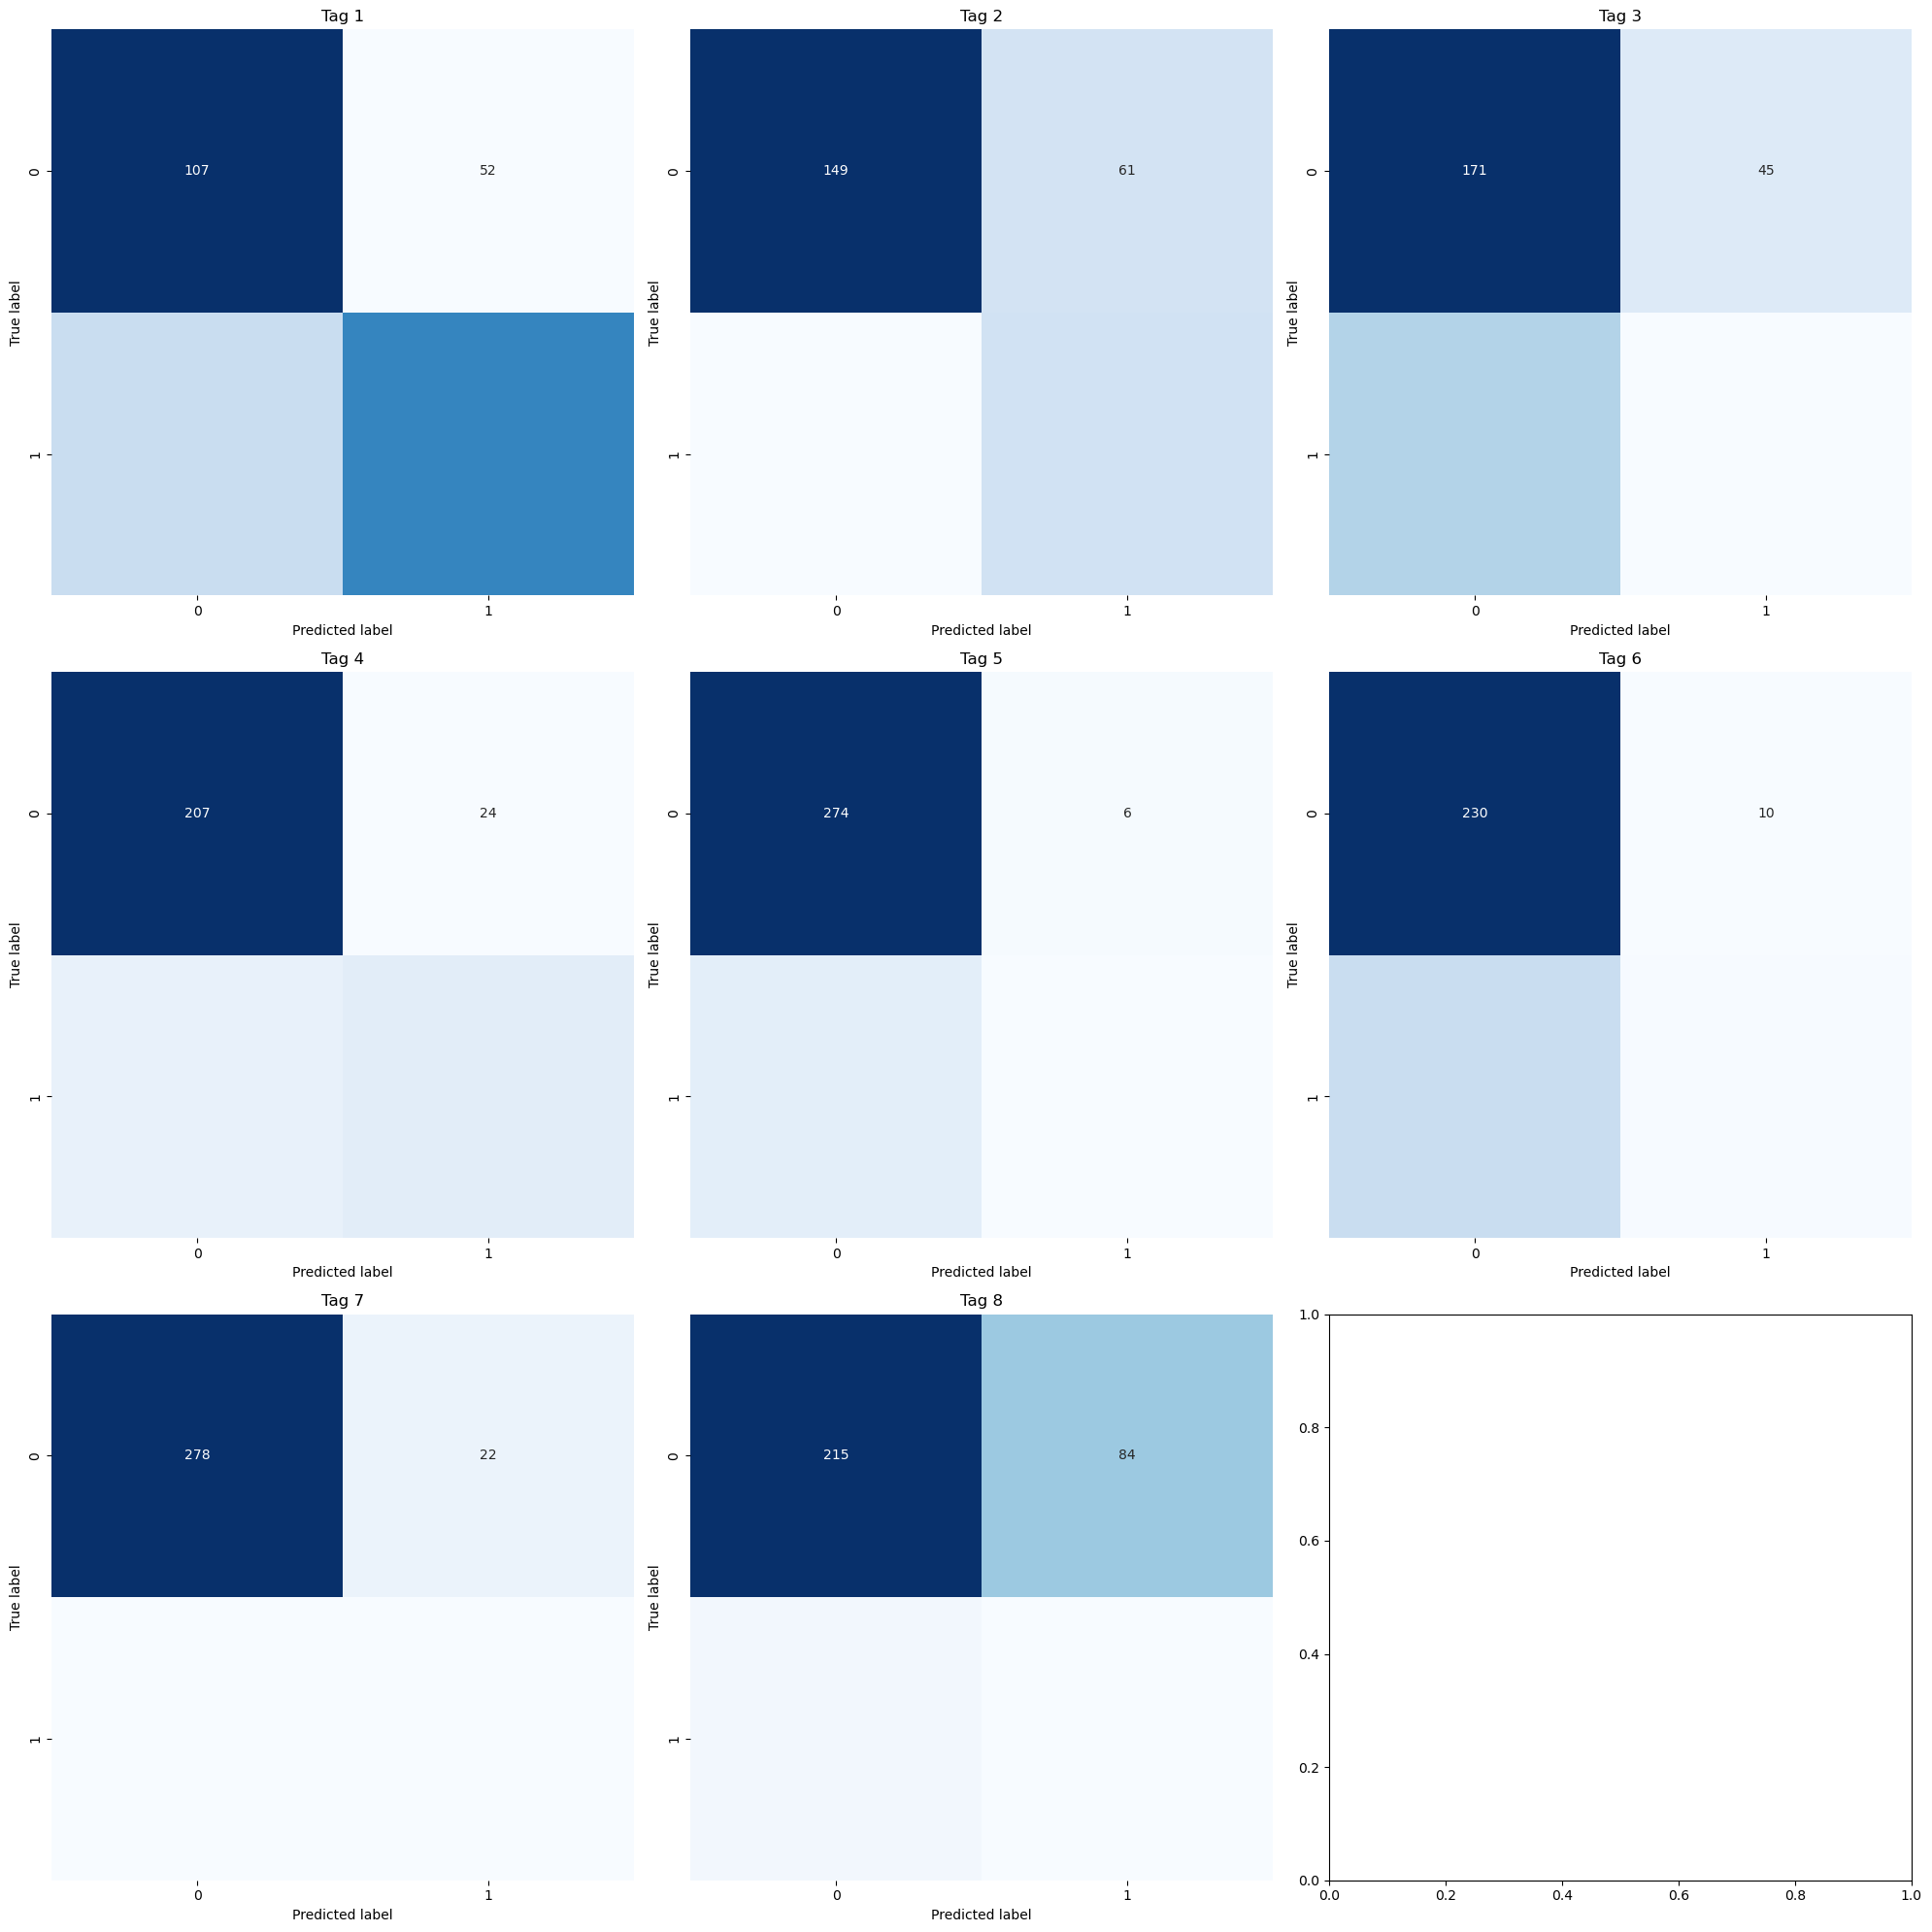

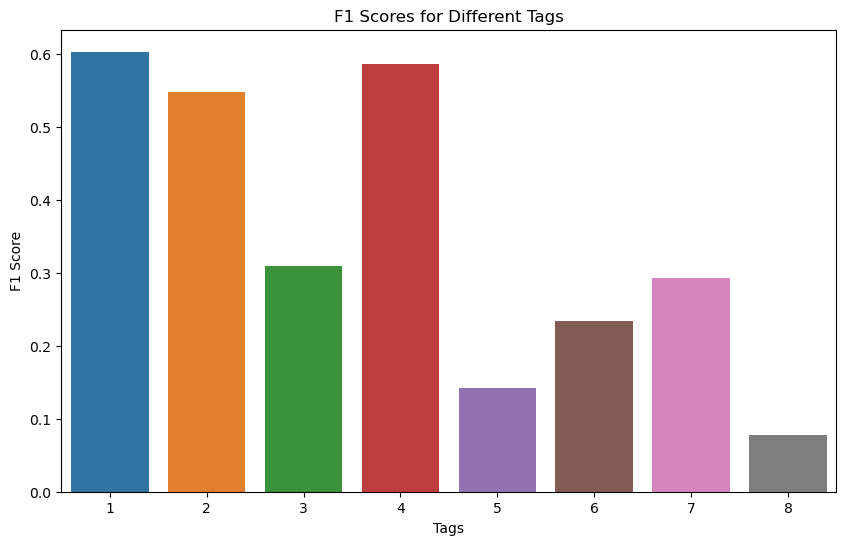

{'1': 0.6033898305084746, '2': 0.5486725663716814, '3': 0.30952380952380953, '4': 0.5866666666666668, '5': 0.14285714285714288, '6': 0.2340425531914893, '7': 0.2926829268292683, '8': 0.0784313725490196}


In [11]:
f1_plot(df)

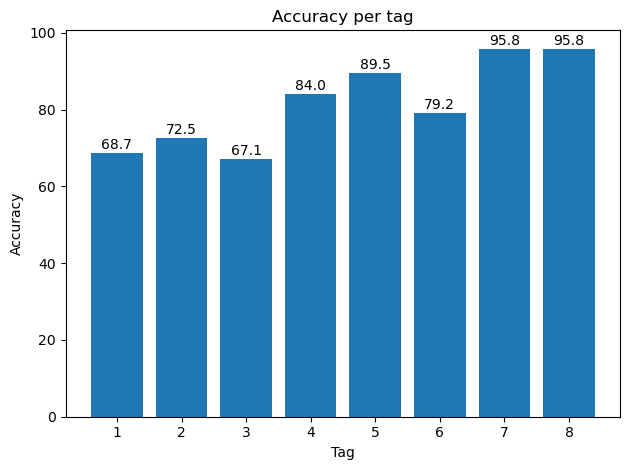

In [8]:
accuracy_plot(df)

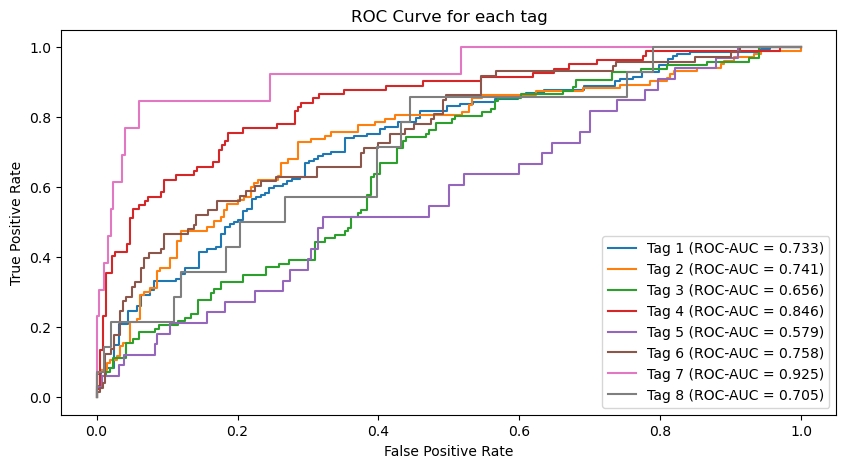

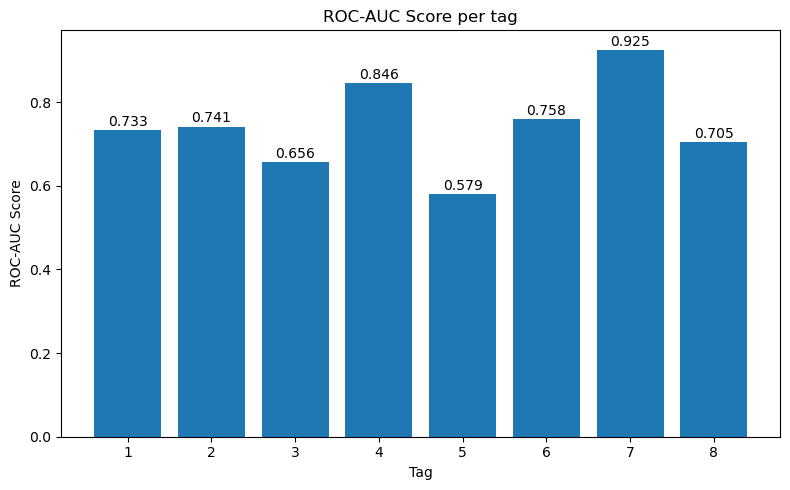

In [9]:
roc_auc_plot(df)